In [22]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate
from qiskit.visualization import *
from qiskit.quantum_info import process_fidelity

import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import minimize
from math import pi, cos, sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product

In [23]:
T = random_unitary(2)
U = None  # Initialize U

In [24]:
# Define the objective function to maximize
def objective_function(theta_values):
    global U  # Use the global U variable
    theta_1, theta_2, theta_3 = theta_values

    # Define the H and D states as needed
    psi_1 = Statevector.from_label("0")
    psi_2 = Statevector.from_label("+")

    # Calculate the U gate
    qc = QuantumCircuit(1)
    qc.rz(theta_1, 0)
    qc.rx(theta_2, 0)
    qc.rz(theta_3, 0)
    U = Operator(qc)

    # Calculate the probabilities
    psi_a = psi_1.evolve(T).evolve(U)
    psi_b = psi_2.evolve(T).evolve(U)

    prob_a = psi_a.expectation_value(psi_1).real
    prob_b = psi_b.expectation_value(psi_2).real

    # Calculate the product of probabilities to maximize
    return -(prob_a * prob_b)

In [25]:
# Define a custom callback function to print intermediate results
def callback(xk):
    print(f"Optimization Step: {len(callback.steps)}")
    print(f"Theta Values: {xk}")
    max_prob = -objective_function(xk)
    print(f"Maximum Probability: {max_prob}\n")
    callback.steps.append(max_prob)

callback.steps = []

In [26]:
# Initial guess for theta values
initial_theta_values = [0.0, 0.0, 0.0]

# Perform the optimization with the custom callback
result = minimize(objective_function, initial_theta_values, method='Powell', options={'disp': True, 'maxiter': 10}, callback=callback)

# Extract the optimal theta values and the maximum probability
optimal_theta_values = result.x
max_probability = -result.fun

# Print the final optimal theta values and maximum probability
print("\nOptimal Theta Values:", optimal_theta_values)
print("Maximum Probability:", max_probability)

Optimization Step: 0
Theta Values: [ 0.28679692 -1.48041085 -0.77169037]
Maximum Probability: 0.9969373988072687

Optimization Step: 1
Theta Values: [ 0.37638525 -1.47892084 -0.77939636]
Maximum Probability: 0.9999991751332018

Optimization Step: 2
Theta Values: [ 0.37794558 -1.4784487  -0.7795032 ]
Maximum Probability: 0.9999999991602657

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 3
         Function evaluations: 103

Optimal Theta Values: [ 0.37794558 -1.4784487  -0.7795032 ]
Maximum Probability: 0.9999999991602657


In [27]:
process_fidelity(T @ U, Operator(np.eye(2)))

0.9999999993042568

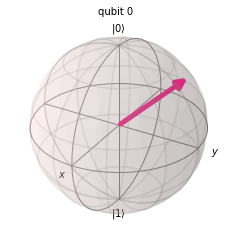

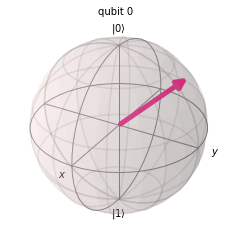

In [29]:
psi_test = random_statevector(2)
display(plot_bloch_multivector(psi_test))
display(plot_bloch_multivector(psi_test.evolve(T).evolve(U)))